In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_excel('accident_stat.xlsx')
data

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


C:\Users\JYS\AppData\Local\Temp\ipykernel_14236\1159058797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carcar['사망비율'] = carcar['사망자수']/carcar['사고건수']


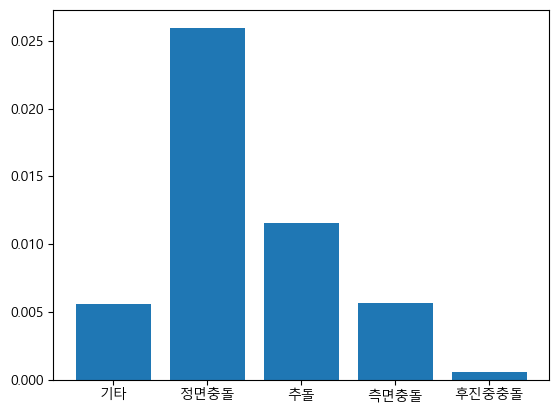

In [13]:
carcar = data.loc[data['사고유형대분류'] == '차대차']
carcar['사망비율'] = carcar['사망자수']/carcar['사고건수']
acc = carcar.groupby('사고유형')['사망비율'].mean()
plt.bar(range(len(acc)), acc)
plt.xticks(range(len(acc)), acc.keys())
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

In [14]:
data.loc[(data.groupby('사고유형대분류')['사망자수'].idxmax())]['사고유형'].tolist()

['횡단중', '측면충돌', '공작물충돌']

In [15]:
data['중상비율'] = data['중상자수']/data['사고건수']
data

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,중상비율
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458,0.469883
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183,0.396362
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121,0.285352
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131,0.334681
4,차대사람,기타,기타,14675,333,4887,9139,1062,0.333015
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588,0.448429
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781,0.247688
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162,0.086511
8,차대차,추돌,추돌,32717,379,7564,47111,2748,0.231195
9,차대차,기타,기타,44222,248,9990,49616,3839,0.225906


In [16]:
save_data = data.loc[data['중상비율'] > 0.5]
save_data.to_csv('중상비율.csv')